In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from childes_mi.utils.paths import DATA_DIR, FIGURE_DIR, ensure_dir
from childes_mi.utils.general import flatten,save_fig

In [26]:
from childes_mi.information_theory import model_fitting as mf

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

In [28]:
MI_DF = pd.read_pickle(DATA_DIR/'mi/epic_kitchens_longest.pickle')

In [29]:
MI_DF[:3]

,MI,MI_var,shuff_MI,shuff_MI_var,distances,seq,seq_len,video_id
0,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.175369290161939, 3.1918425929135363, 3.1889...","[0.08763145133753221, 0.08766981995621993, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[17, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 2, 1, 3, 0,...",879,P01_09
1,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.211141080603772, 3.204020089721605, 3.16453...","[0.08775272040615731, 0.08741543603381008, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 9, ...",749,P30_05
2,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.1857398345048873, 3.1914890944978076, 3.203...","[0.08773148364617535, 0.08763596068774765, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 0, 2, 0, 9, 0, 9, 2, 8, 3, 0, 2, 0, 0, 14,...",742,P22_07


### fit data

In [30]:
MI_DF = MI_DF.assign(**{i:np.nan for i in ['exp_results', 'pow_results', 'concat_results',
     'R2_exp', 'R2_concat', 'R2_power', 'AICc_exp',
     'AICc_concat', 'AICc_power', 'bestfitmodel', 'curvature', 'min_peak']})
MI_DF['curvature'] = MI_DF['curvature'].astype(object)

In [31]:
MI_DF = MI_DF.reset_index()

In [32]:
n = 100 # max distance for computation
for idx, row in tqdm(MI_DF.iterrows(), total=len(MI_DF)):
    # get signal
    sig = np.array(row.MI-row.shuff_MI)
    distances = row.distances
    # fit models
    results_power, results_exp, results_pow_exp, best_fit_model = mf.fit_models(distances, sig)

    # get fit results
    R2_exp, R2_concat, R2_power, AICc_exp, \
        AICc_pow, AICc_concat = mf.fit_results(sig, distances, 
                                              results_exp, results_power,
                                              results_pow_exp)
    min_peak = np.nan
    
    # get save model fit results to MI_DF
    MI_DF.loc[idx, np.array(['exp_results', 'pow_results', 'concat_results',
                         'R2_exp', 'R2_concat', 'R2_power', 'AICc_exp',
                         'AICc_concat', 'AICc_power', 'bestfitmodel',  'min_peak'])] = [
        results_exp, results_power, results_pow_exp,
        R2_exp, R2_concat, R2_power, AICc_exp,
        AICc_concat, AICc_pow, best_fit_model,
        min_peak
    ]

/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/childes_mi/information_theory/model_fitting.py:8: RuntimeWarning: invalid value encountered in log
  return np.abs(np.log(y_true) - np.log(y_model)) * (1 / (np.log(1 + x)))


In [33]:
MI_DF[:3]

,index,MI,MI_var,shuff_MI,shuff_MI_var,distances,seq,seq_len,video_id,exp_results,...,concat_results,R2_exp,R2_concat,R2_power,AICc_exp,AICc_concat,AICc_power,bestfitmodel,curvature,min_peak
0,0,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.175369290161939, 3.1918425929135363, 3.1889...","[0.08763145133753221, 0.08766981995621993, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[17, 0, 1, 2, 0, 0, 0, 0, 3, 1, 0, 2, 1, 3, 0,...",879,P01_09,<lmfit.minimizer.MinimizerResult object at 0x7...,...,<lmfit.minimizer.MinimizerResult object at 0x7...,0.902417,0.889252,0.889252,-152.772448,-142.324491,-147.330734,exp,NaN,NaN
1,1,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.211141080603772, 3.204020089721605, 3.16453...","[0.08775272040615731, 0.08741543603381008, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 9, ...",749,P30_05,<lmfit.minimizer.MinimizerResult object at 0x7...,...,<lmfit.minimizer.MinimizerResult object at 0x7...,0.864319,0.864439,0.849184,-143.689236,-138.749016,-139.036011,exp,NaN,NaN
2,2,"[3.632823163404609, 3.4601848792965475, 3.3577...","[0.09071928900309506, 0.0893417844119914, 0.08...","[3.1857398345048873, 3.1914890944978076, 3.203...","[0.08773148364617535, 0.08763596068774765, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 0, 2, 0, 9, 0, 9, 2, 8, 3, 0, 2, 0, 0, 14,...",742,P22_07,<lmfit.minimizer.MinimizerResult object at 0x7...,...,<lmfit.minimizer.MinimizerResult object at 0x7...,0.889679,0.889952,0.876942,-148.877303,-143.977695,-144.178894,exp,NaN,NaN


### plot fits

In [34]:
from matplotlib import gridspec

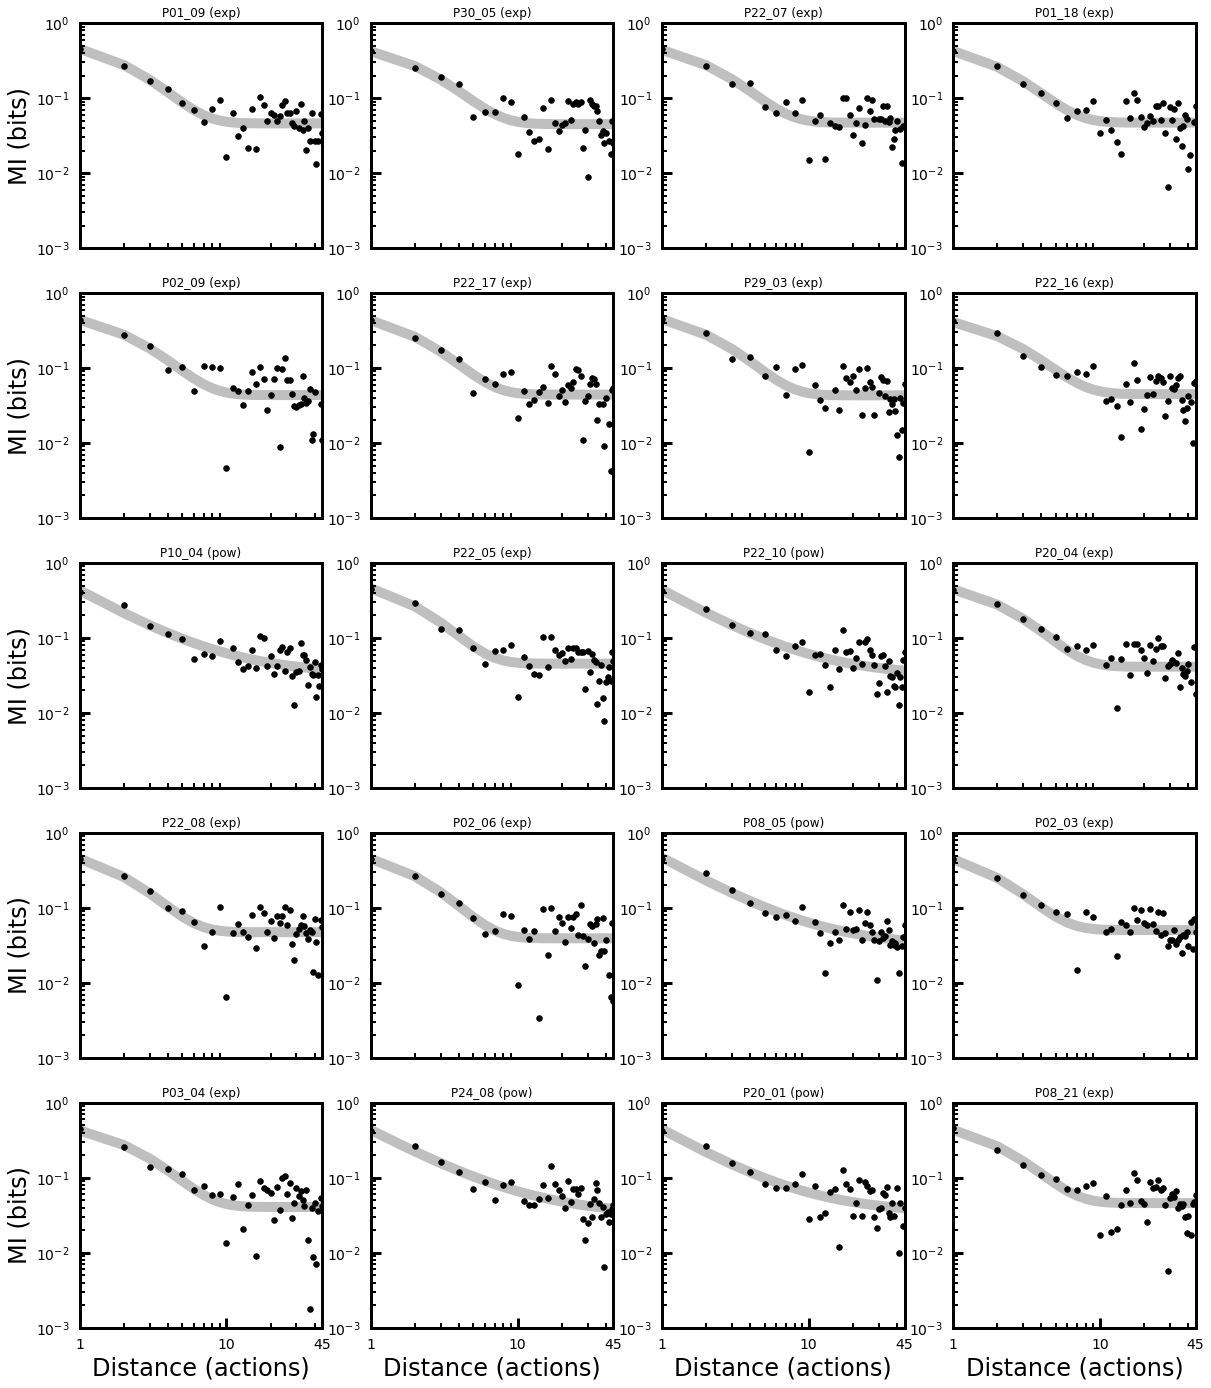

In [39]:
ncols = 4
nrows = 5
yoff=-.20

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 24))
for axi, (idx, row) in enumerate(MI_DF[:nrows*ncols].iterrows()):
    ax = axs.flatten()[axi]

    color = "k"
    sig = np.array(row.MI - row.shuff_MI)
    distances = row.distances

    sig_lims = np.log([np.min(sig[sig>0]), np.nanmax(sig)])
    sig_lims = [sig_lims[0] - (sig_lims[1]-sig_lims[0])/10,
                    sig_lims[1] + (sig_lims[1]-sig_lims[0])/10]


    if axi in [ncols*i for i in range(nrows)]:
        ax.set_ylabel("MI (bits)", labelpad=5, fontsize=24)
        ax.yaxis.set_label_coords(yoff, 0.5)

    distances_model = np.logspace(0, np.log10(distances[-1]), base=10, num=1000)

    # plot real data
    ax.scatter(distances, sig, alpha=1, s=30, color=color)
    #print(idx)
    if row.bestfitmodel == "pow_exp":
        y_model = mf.get_y(mf.pow_exp_decay, row.concat_results, distances)

    elif row.bestfitmodel == "exp":
        y_model = mf.get_y(mf.exp_decay, row.exp_results, distances)

    elif row.bestfitmodel == "pow":
        y_model = mf.get_y(mf.powerlaw_decay, row.pow_results, distances)

    #print(y_model[:3])
    # plot modelled data
    ax.plot(distances, y_model, alpha=0.25, lw=10, color=color)

    ax.set_title("{} ({})".format(row.video_id, row.bestfitmodel))
    ax.set_xlim([distances[0], distances[-1]])
    sig_lims[0] = np.log(10e-6)  #
    ax.set_ylim([1e-3, 1])
    ax.tick_params(which="both", direction="in", labelsize=14, pad=10)
    ax.tick_params(which="major", length=10, width=3)
    ax.tick_params(which="minor", length=5, width=2)
    ax.set_xscale("log", basex=10)
    ax.set_yscale("log", basey=10)
    ax.set_xticks([])
    for axis in ["top", "bottom", "left", "right"]:
        ax.spines[axis].set_linewidth(3)
        ax.spines[axis].set_color("k")

    if axi in range(nrows*ncols - ncols, nrows*ncols):
        ax.set_xticks([1,10,45])
        ax.set_xticklabels(['1','10','45'])
        ax.set_xlabel("Distance (actions)", labelpad=5, fontsize=24)

ensure_dir(FIGURE_DIR/ 'mi' / 'indv')
save_fig(FIGURE_DIR/ 'mi' / 'indv' /('epic_kitchens_longest'))
plt.show()